In [97]:
import sys
sys.path.append('/Users/koush/Projects/Banksy_py')
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
from banksy_utils.load_data import load_adata, display_adata

In [114]:
adata = sc.read_h5ad('/Users/koush/Projects/SpaceOracle/data/slideseq/mLND3_1.h5ad')
adata.obs = adata.obs.join(
    pd.read_csv('/Users/koush/Projects/SpaceOracle/data/slideseq/day3_1_rctd.csv', index_col=0))
# adata = sc.read_h5ad('/Users/koush/Projects/SpaceOracle/data/survey/mouse_kidney_13.h5ad')

In [116]:
adata.obs.spot_class.value_counts()

spot_class
singlet              15920
reject                7666
doublet_uncertain      894
doublet_certain        360
Name: count, dtype: int64

In [119]:
adata = adata[adata.obs.spot_class.isin(['singlet', 'doublet_certain'])]
adata

View of AnnData object with n_obs × n_vars = 16280 × 24649
    obs: 'cluster', 'spot_class', 'first_type', 'second_type', 'first_class', 'second_class', 'min_score', 'singlet_score', 'conv_all', 'conv_doublet', '1', '2', '3', '4', '5', '6', '7'
    uns: 'cluster_colors'
    obsm: 'X_spatial', 'spatial'

In [120]:
adata

View of AnnData object with n_obs × n_vars = 16280 × 24649
    obs: 'cluster', 'spot_class', 'first_type', 'second_type', 'first_class', 'second_class', 'min_score', 'singlet_score', 'conv_all', 'conv_doublet', '1', '2', '3', '4', '5', '6', '7'
    uns: 'cluster_colors'
    obsm: 'X_spatial', 'spatial'

In [34]:
raw_y, raw_x = adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1]

In [35]:
display_adata(adata)

Displaying adata Object and their attributes
Adata attributes and dimensions:


AnnData object with n_obs × n_vars = 8779 × 3512
    obs: 'batch', 'rxn', 'n_counts', 'ct1', 'ct2', 'ct3', 'high_q', 'ct4', 'chip', 'exp', 'cond', 'samp-id', 'samp-type', 'medulla_cortex', 'domain', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'cell_type', 'cell_type_int'
    var: 'n_counts', 'n_cells', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'
    obsm: 'spatial'
    layers: 'imputed_count', 'normalized_count', 'raw_count'
    obsp: 'connectivities', 'distances'

Matrix sparsity: 3567133 filled elements (0.12) out of 30831848
max: 8.085062980651855, min: 0.05846492573618889

Displaying observations (adata.obs)


batch     rxn  n_counts       ct1   ct2       ct3 high_q  \
AAACCCAAGAGGGTCT-13    13  rxn104    6189.0   Myeloid   Mac     Mac_0   True   
AAACCCAAGCGTGTTT-13    13  rxn104    1739.0  Lymphoid    NK      NK_0   True   
AAACCCAAGGTGATAT-13    13  rxn104   10302.0   Myeloid   Mac     Mac_0   True   
AAACCCAAGTCTAACC-13    13  rxn104    5932.0  Lymphoid     T  Memory_T   True   
AAACCCAAGTGCCCGT-13    13  rxn104    4095.0  Lymphoid     B         B   True   
...                   ...     ...       ...       ...   ...       ...    ...   
TTTGTTGGTATGCGTT-13    13  rxn104    4349.0   Myeloid   Mac     Mac_0   True   
TTTGTTGGTTGAGGAC-13    13  rxn104    3095.0   Myeloid   Mac     Mac_2   True   
TTTGTTGTCACTGGTA-13    13  rxn104    8341.0  Lymphoid     B  B_Memory   True   
TTTGTTGTCGATGCTA-13    13  rxn104     929.0   Myeloid  Mono      Mono   True   
TTTGTTGTCTCTTAAC-13    13  rxn104   10020.0   Myeloid   Mac     Mac_0   True   

                        ct4 chip     exp  ... log1p_total_counts  \
AAACCCAAGAGGGTCT-13   Mac_0  410  exp216  ...           8.730690   
AAACCCAAGCGTGTTT-13    NK_1  410  exp216  ...           7.461640   
AAACCCAAGGTGATAT-13   Mac_0  410  exp216  ...           9.240191   
AAACCCAAGTCTAACC-13     T_3  410  exp216  ...           8.688285   
AAACCCAAGTGCCCGT-13     B_0  410  exp216  ...           8.317766   
...                     ...  ...     ...  ...                ...   
TTTGTTGGTATGCGTT-13   Mac_0  410  exp216  ...           8.377932   
TTTGTTGGTTGAGGAC-13   Mac_1  410  exp216  ...           8.037867   
TTTGTTGTCACTGGTA-13     B_2  410  exp216  ...           9.029058   
TTTGTTGTCGATGCTA-13  Mono_0  410  exp216  ...           6.835185   
TTTGTTGTCTCTTAAC-13   Mac_0  410  exp216  ...           9.212439   

                    pct_counts_in_top_50_genes pct_counts_in_top_100_genes  \
AAACCCAAGAGGGTCT-13                  29.924059                   39.796413   
AAACCCAAGCGTGTTT-13                  26.854514                   35.307648   
AAACCCAAGGTGATAT-13                  24.170064                   32.770336   
AAACCCAAGTCTAACC-13                  19.133513                   26.685772   
AAACCCAAGTGCCCGT-13                  21.074481                   30.134310   
...                                        ...                         ...   
TTTGTTGGTATGCGTT-13                  26.879742                   35.594390   
TTTGTTGGTTGAGGAC-13                  28.659128                   36.768982   
TTTGTTGTCACTGGTA-13                  26.159933                   35.031771   
TTTGTTGTCGATGCTA-13                  47.362756                   61.141012   
TTTGTTGTCTCTTAAC-13                  29.361277                   38.662675   

                    pct_counts_in_top_200_genes pct_counts_in_top_500_genes  \
AAACCCAAGAGGGTCT-13                   52.140895                   68.233963   
AAACCCAAGCGTGTTT-13                   46.808511                   67.395055   
AAACCCAAGGTGATAT-13                   43.564356                   59.299165   
AAACCCAAGTCTAACC-13                   37.137559                   54.551585   
AAACCCAAGTGCCCGT-13                   41.440781                   60.561661   
...                                         ...                         ...   
TTTGTTGGTATGCGTT-13                   46.378478                   63.232927   
TTTGTTGGTTGAGGAC-13                   47.560582                   65.621971   
TTTGTTGTCACTGGTA-13                   45.845822                   61.239660   
TTTGTTGTCGATGCTA-13                   75.026911                  100.000000   
TTTGTTGTCTCTTAAC-13                   50.738523                   67.055888   

                     total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCCAAGAGGGTCT-13              0.0                    0.0            0.0   
AAACCCAAGCGTGTTT-13              0.0                    0.0            0.0   
AAACCCAAGGTGATAT-13              0.0                    0.0            0.0   
AAACCCAAGTCTAACC-13              0.0        

Displaying variables (adata.var)


n_counts  n_cells      mean       std     mt  n_cells_by_counts  \
Sox17     25933.0      817  0.067507  0.341383  False                817   
St18      14720.0      838  0.040006  0.274918  False                838   
Gm26901     758.0       70  0.003564  0.063557  False                 70   
Prex2     81069.0     1915  0.200547  0.618866  False               1915   
Gm29570     383.0       94  0.002081  0.050156  False                 94   
...           ...      ...       ...       ...    ...                ...   
Amelx       443.0       86  0.002281  0.048291  False                 86   
Gm15246    1041.0      122  0.004906  0.076912  False                122   
Mid1      44553.0     2762  0.182609  0.475576  False               2762   
Gm15726    5614.0      524  0.033360  0.214171  False                524   
Gm21887    8760.0     1397  0.044042  0.223079  False               1397   

         mean_counts  log1p_mean_counts  pct_dropout_by_counts  total_counts  \
Sox17       0.403349           0.338861              90.693701        3541.0   
St18        0.408703           0.342669              90.454494        3588.0   
Gm26901     0.010138           0.010087              99.202643          89.0   
Prex2       1.399362           0.875203              78.186582       12285.0   
Gm29570     0.011960           0.011889              98.929263         105.0   
...              ...                ...                    ...           ...   
Amelx       0.010024           0.009974              99.020390          88.0   
Gm15246     0.019820           0.019626              98.610320         174.0   
Mid1        0.679690           0.518609              68.538558        5967.0   
Gm15726     0.075179           0.072488              94.031211         660.0   
Gm21887     0.196036           0.179013              84.087026        1721.0   

         log1p_total_counts  highly_variable     means  dispersions  \
Sox17              8.172447             True  0.182814     1.353885   
St18               8.185629             True  0.300894     2.100963   
Gm26901            4.499810             True  0.008606     1.040037   
Prex2              9.416216             True  0.670866     1.802249   
Gm29570            4.663439             True  0.008745     0.966071   
...                     ...              ...       ...          ...   
Amelx              4.488636             True  0.009262     0.815322   
Gm15246            5.164786             True  0.015064     0.796897   
Mid1               8.694167             True  0.409578     1.115944   
Gm15726            6.493754             True  0.057127     1.043832   
Gm21887            7.451241             True  0.162265     1.001594   

         dispersions_norm  
Sox17            1.696727  
St18             2.875489  
Gm26901          0.945065  
Prex2            1.476197  
Gm29570          0.767919  
...                   ...  
Amelx            0.406876  
Gm15246          0.362748  
Mid1             0.646000  
Gm15726          0.954154  
Gm21887          0.852996  

[3512 rows x 15 columns]

In [36]:
from banksy.main import median_dist_to_nearest_neighbour

In [37]:
plot_graph_weights = True
k_geom = 15 # number of spatial neighbours
max_m = 1 # use both mean and AFT
nbr_weight_decay = "scaled_gaussian" # can also choose "reciprocal", "uniform" or "ranked"

# Find median distance to closest neighbours
nbrs = median_dist_to_nearest_neighbour(adata, key = 'spatial')


Median distance to closest cell = 0.12857142857142634

---- Ran median_dist_to_nearest_neighbour in 0.03 s ----



In [48]:
adata.obs['x'] = raw_x
adata.obs['y'] = raw_y

In [49]:
nbrs

NearestNeighbors(algorithm='ball_tree')


Median distance to closest cell = 0.12857142857142634

---- Ran median_dist_to_nearest_neighbour in 0.03 s ----

---- Ran generate_spatial_distance_graph in 0.06 s ----

---- Ran row_normalize in 0.01 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 0.15 s ----

----- Plotting Edge Histograms for m = 0 -----

Edge weights (distances between cells): median = 0.25155764746872555, mode = 0.25494721457804936

---- Ran plot_edge_histogram in 0.02 s ----


Edge weights (weights between cells): median = 0.056779693008943824, mode = 0.01667148146612284

---- Ran plot_edge_histogram in 0.02 s ----

---- Ran generate_spatial_distance_graph in 0.09 s ----

---- Ran theta_from_spatial_graph in 0.04 s ----

---- Ran row_normalize in 0.01 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 0.22 s ----

----- Plotting Edge Histograms for m = 1 -----

Edge weights (distances between cells): median = 0.3374999999999986, mode = 0.32109837414162234

---- Ran plot_edge_histogram in 0.07 s ----

/opt/homebrew/Caskroom/miniforge/base/envs/SpaceOracle/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/Caskroom/miniforge/base/envs/SpaceOracle/lib/python3.9/site-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/opt/homebrew/Caskroom/miniforge/base/envs/SpaceOracle/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7004: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16
/opt/homebrew/Caskroom/miniforge/base/envs/SpaceOracle/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Maximum weight: 0.16232598678235785

---- Ran plot_graph_weights in 0.58 s ----

Maximum weight: (0.08609554441496477+0j)

---- Ran plot_graph_weights in 1.41 s ----

----- Plotting theta Graph -----


/opt/homebrew/Caskroom/miniforge/base/envs/SpaceOracle/lib/python3.9/site-packages/matplotlib/collections.py:426: ComplexWarning: Casting complex values to real discards the imaginary part
  renderer.draw_path_collection(


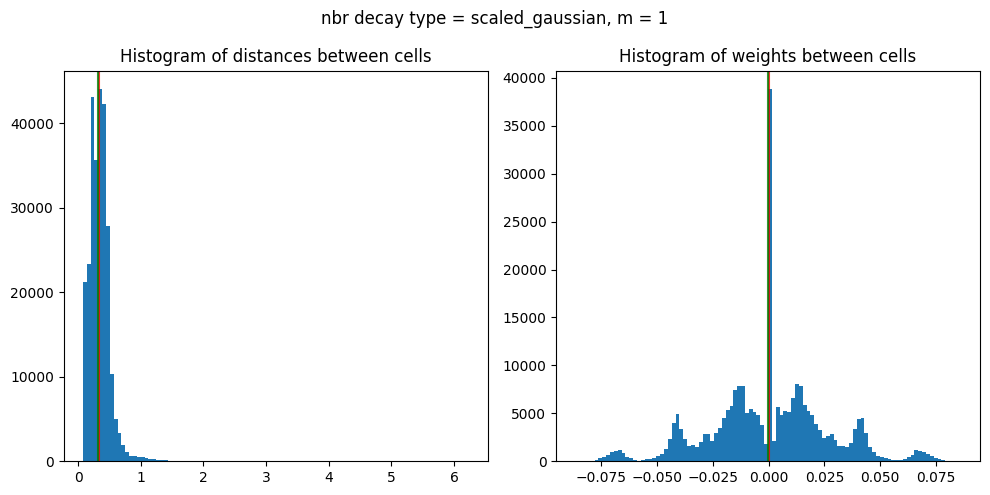

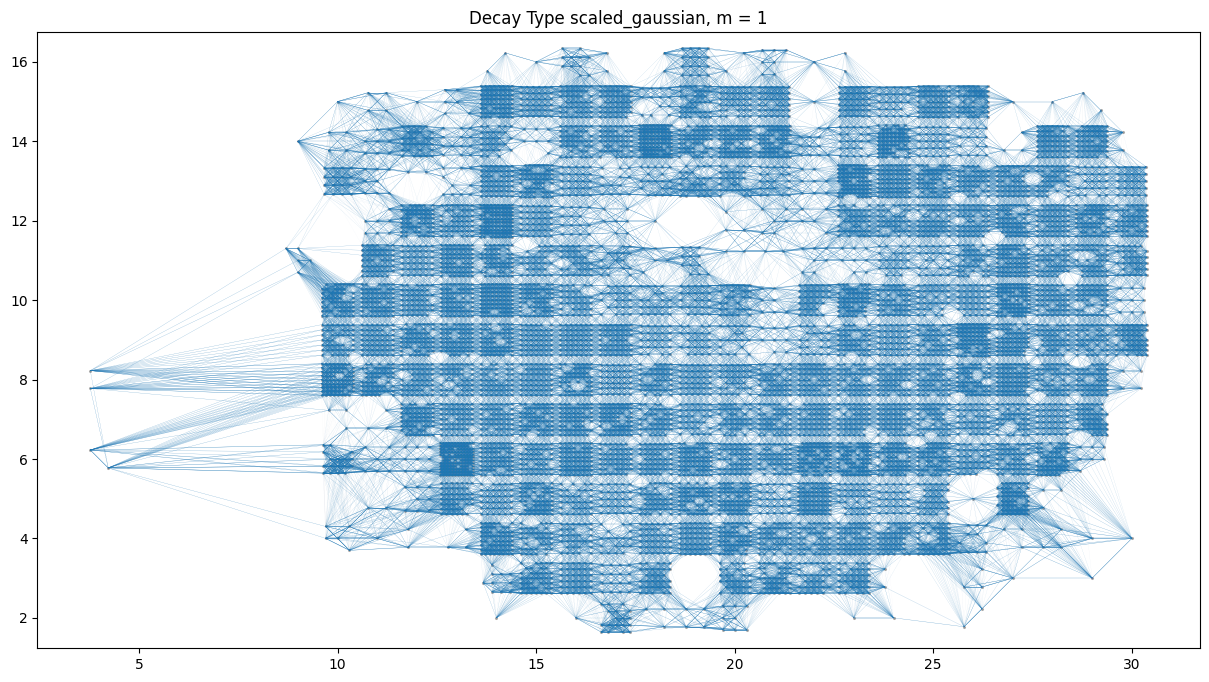

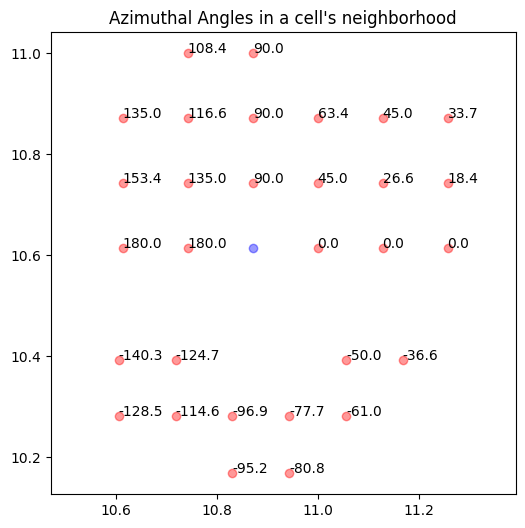

In [57]:
from banksy.initialize_banksy import initialize_banksy

banksy_dict = initialize_banksy(
    adata,
    ('x', 'y', 'spatial'),
    k_geom,
    nbr_weight_decay=nbr_weight_decay,
    max_m=max_m,
    plt_edge_hist=True,
    plt_nbr_weights=True,
    plt_agf_angles=False, # takes long time to plot
    plt_theta=True,
)

In [58]:
from banksy.embed_banksy import generate_banksy_matrix

# The following are the main hyperparameters for BANKSY
# -----------------------------------------------------
resolutions = [0.5]  # clustering resolution for UMAP
pca_dims = [20]  # Dimensionality in which PCA reduces to
lambda_list = [0.2]  # list of lambda parameters

banksy_dict, banksy_matrix = generate_banksy_matrix(adata,
                                                    banksy_dict,
                                                    lambda_list,
                                                    max_m)
banksy_matrix

Runtime Jan-20-2025-18-12

3512 genes to be analysed:
Gene List:
Index(['Sox17', 'St18', 'Gm26901', 'Prex2', 'Gm29570', 'Lactb2', 'Kcnb2',
       'Stau2', 'Pi15', 'Crispld1',
       ...
       'Tmsb4x', 'Tlr8', 'Tlr7', 'Frmpd4', 'Arhgap6', 'Amelx', 'Gm15246',
       'Mid1', 'Gm15726', 'Gm21887'],
      dtype='object', length=3512)

Check if X contains only finite (non-NAN) values
Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <8779x8779 sparse matrix of type '<class 'numpy.float64'>'
	with 131685 stored elements in Compressed Sparse Row format>, 1: <8779x8779 sparse matrix of type '<class 'numpy.complex128'>'
	with 263370 stored elements in Compressed Sparse Row format>}}

Nbr matrix | Mean: 0.12 | Std: 0.25
Size of Nbr | Shape: (8779, 3512)
Top 3 entries of Nbr Mat:

[[0.         0.         0.        ]
 [0.         0.01825504 0.        ]
 [0.56372844 0.05041618 0.        ]]

AGF matrix | Mean: 0.04 | Std: 0.05
Size of AGF mat (m = 1) | Shape: (8779, 3512)
Top entries of A

AnnData object with n_obs × n_vars = 8779 × 10536
    obs: 'batch', 'rxn', 'n_counts', 'ct1', 'ct2', 'ct3', 'high_q', 'ct4', 'chip', 'exp', 'cond', 'samp-id', 'samp-type', 'medulla_cortex', 'domain', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'cell_type', 'cell_type_int', 'x', 'y'
    var: 'n_counts', 'n_cells', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'is_nbr', 'k'

In [59]:
from banksy.main import concatenate_all

banksy_dict["nonspatial"] = {
    # Here we simply append the nonspatial matrix (adata.X) to obtain the nonspatial clustering results
    0.0: {"adata": concatenate_all([adata.X], 0, adata=adata), }
}

print(banksy_dict['nonspatial'][0.0]['adata'])

Scale factors squared: [1.]
Scale factors: [1.]
AnnData object with n_obs × n_vars = 8779 × 3512
    obs: 'batch', 'rxn', 'n_counts', 'ct1', 'ct2', 'ct3', 'high_q', 'ct4', 'chip', 'exp', 'cond', 'samp-id', 'samp-type', 'medulla_cortex', 'domain', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'cell_type', 'cell_type_int', 'x', 'y'
    var: 'n_counts', 'n_cells', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'is_nbr', 'k'


In [60]:
from banksy_utils.umap_pca import pca_umap

pca_umap(banksy_dict,
         pca_dims = pca_dims,
         add_umap = True,
         plt_remaining_var = False,
         )

Current decay types: ['scaled_gaussian', 'nonspatial']

Reducing dims of dataset in (Index = scaled_gaussian, lambda = 0.2)

Setting the total number of PC = 20
Original shape of matrix: (8779, 10536)
Reduced shape of matrix: (8779, 20)
------------------------------------------------------------
min_value = -34.220242484423494, mean = -1.861542649787254e-18, max = 90.25631661662527

Conducting UMAP and adding embeddings to adata.obsm["reduced_pc_20_umap"]
UMAP embedding
------------------------------------------------------------
shape: (8779, 2)


AxisArrays with keys: reduced_pc_20, reduced_pc_20_umap

Reducing dims of dataset in (Index = nonspatial, lambda = 0.0)

Setting the total number of PC = 20
Original shape of matrix: (8779, 3512)
Reduced shape of matrix: (8779, 20)
------------------------------------------------------------
min_value = -44.00434494018555, mean = -4.38001457325754e-08, max = 103.16476440429688

Conducting UMAP and adding embeddings to adata.obsm["reduced_pc

In [61]:
from banksy.cluster_methods import run_Leiden_partition

results_df, max_num_labels = run_Leiden_partition(
    banksy_dict,
    resolutions,
    num_nn = 50, # k_expr: number of neighbours in expression (BANKSY embedding or non-spatial) space
    num_iterations = -1, # run to convergenece
    partition_seed = 42,
    match_labels = True,
)

Decay type: scaled_gaussian
Neighbourhood Contribution (Lambda Parameter): 0.2
reduced_pc_20 

reduced_pc_20_umap 

PCA dims to analyse: [20]

Setting up partitioner for (nbr decay = scaled_gaussian), Neighbourhood contribution = 0.2, PCA dimensions = 20)


Nearest-neighbour weighted graph (dtype: float64, shape: (8779, 8779)) has 438950 nonzero entries.
---- Ran find_nn in 0.64 s ----


Nearest-neighbour connectivity graph (dtype: int16, shape: (8779, 8779)) has 438950 nonzero entries.

(after computing shared NN)
Allowing nearest neighbours only reduced the number of shared NN from 4531341 to 438541.


Shared nearest-neighbour (connections only) graph (dtype: int16, shape: (8779, 8779)) has 433076 nonzero entries.

Shared nearest-neighbour (number of shared neighbours as weights) graph (dtype: int16, shape: (8779, 8779)) has 433076 nonzero entries.

sNN graph data:
[24 26 39 ... 13  5 15]

---- Ran shared_nn in 0.18 s ----


-- Multiplying sNN connectivity by weights --


shared NN w

/Users/koush/Projects/Banksy_py/banksy/labels.py:398: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expand_labels(label_list[sort_indices[0]],
/Users/koush/Projects/Banksy_py/banksy/labels.py:414: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_label = label_list[index]


decay  lambda_param  num_pcs  \
nonspatial_pc20_nc0.00_r0.50            nonspatial           0.0       20   
scaled_gaussian_pc20_nc0.20_r0.50  scaled_gaussian           0.2       20   

                                   resolution  num_labels  \
nonspatial_pc20_nc0.00_r0.50              0.5          14   
scaled_gaussian_pc20_nc0.20_r0.50         0.5          11   

                                                                              labels  \
nonspatial_pc20_nc0.00_r0.50       Label object:\nNumber of labels: 14, number of...   
scaled_gaussian_pc20_nc0.20_r0.50  Label object:\nNumber of labels: 11, number of...   

                                                                               adata  \
nonspatial_pc20_nc0.00_r0.50       [[[View of AnnData object with n_obs × n_vars ...   
scaled_gaussian_pc20_nc0.20_r0.50  [[[View of AnnData object with n_obs × n_vars ...   

                                                                           relabeled  
nonspatial_pc20_nc0.00_r0.50       Label object:\nNumber of labels: 14, number of...  
scaled_gaussian_pc20_nc0.20_r0.50  Label object:\nNumber of labels: 11, number of...

Saving figure at /tmp/slideseq_mousecerebellum_nonspatial_pc20_nc0.00_r0.50_spatialmap.png
number of labels: 14
---- Ran plot_2d_embeddings in 0.00 s ----

number of labels: 14
---- Ran plot_2d_embeddings in 0.00 s ----

number of labels: 14
---- Ran plot_2d_embeddings in 0.00 s ----

---- Ran row_normalize in 0.00 s ----


matrix multiplying labels x weights x labels-transpose ((14, 8779) x (8779, 8779) x (8779, 14))

Saving figure at /tmp/slideseq_mousecerebellum_scaled_gaussian_pc20_nc0.20_r0.50_spatialmap.png
number of labels: 11
---- Ran plot_2d_embeddings in 0.00 s ----

number of labels: 11
---- Ran plot_2d_embeddings in 0.00 s ----

number of labels: 11
---- Ran plot_2d_embeddings in 0.00 s ----

---- Ran row_normalize in 0.00 s ----


matrix multiplying labels x weights x labels-transpose ((11, 8779) x (8779, 8779) x (8779, 11))



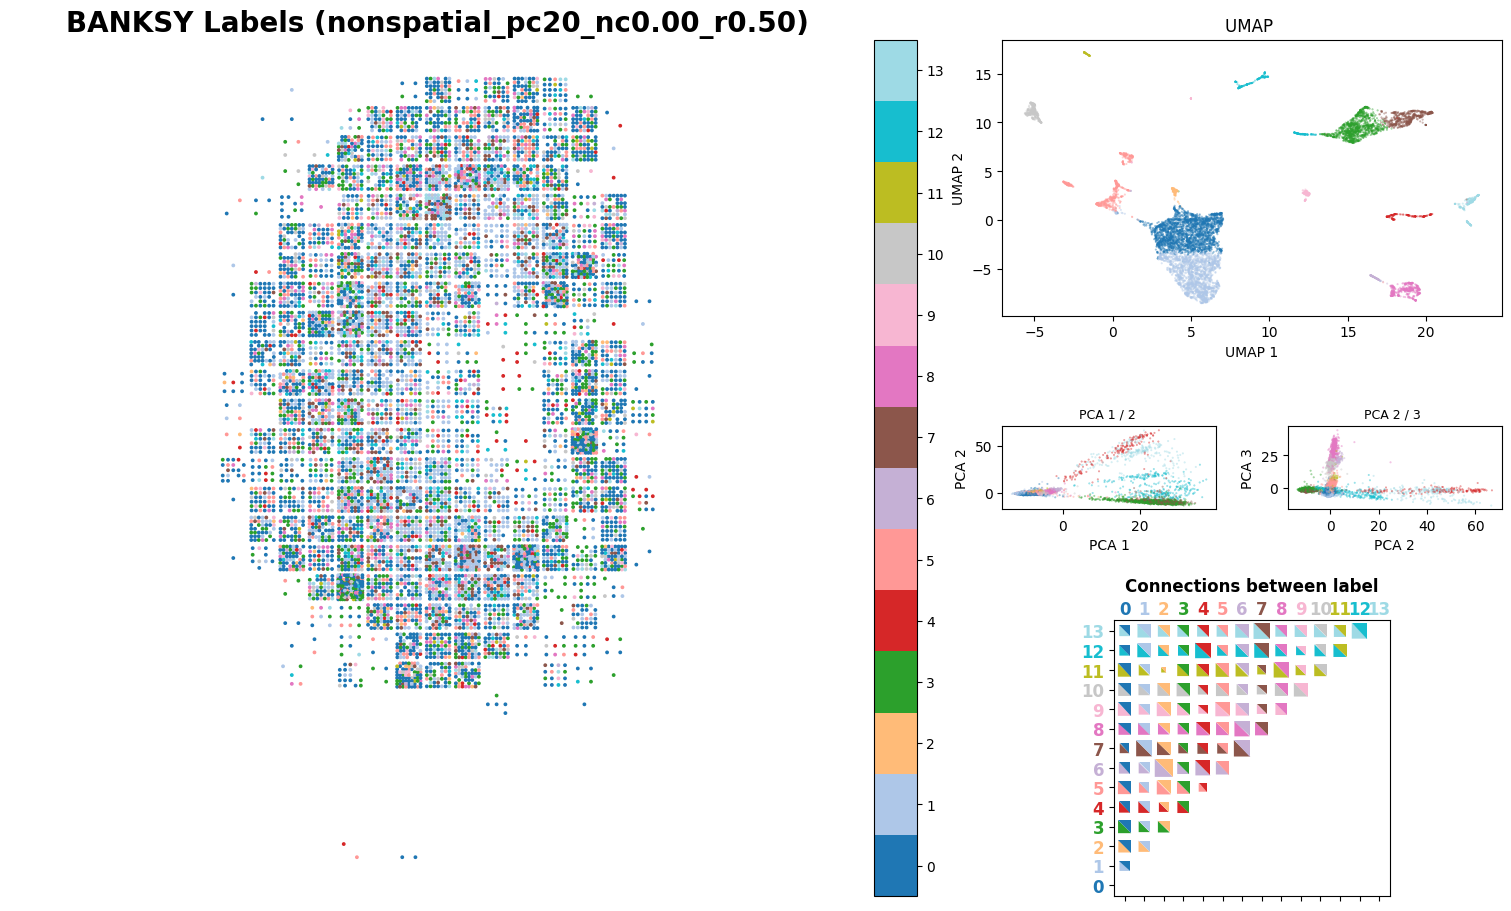

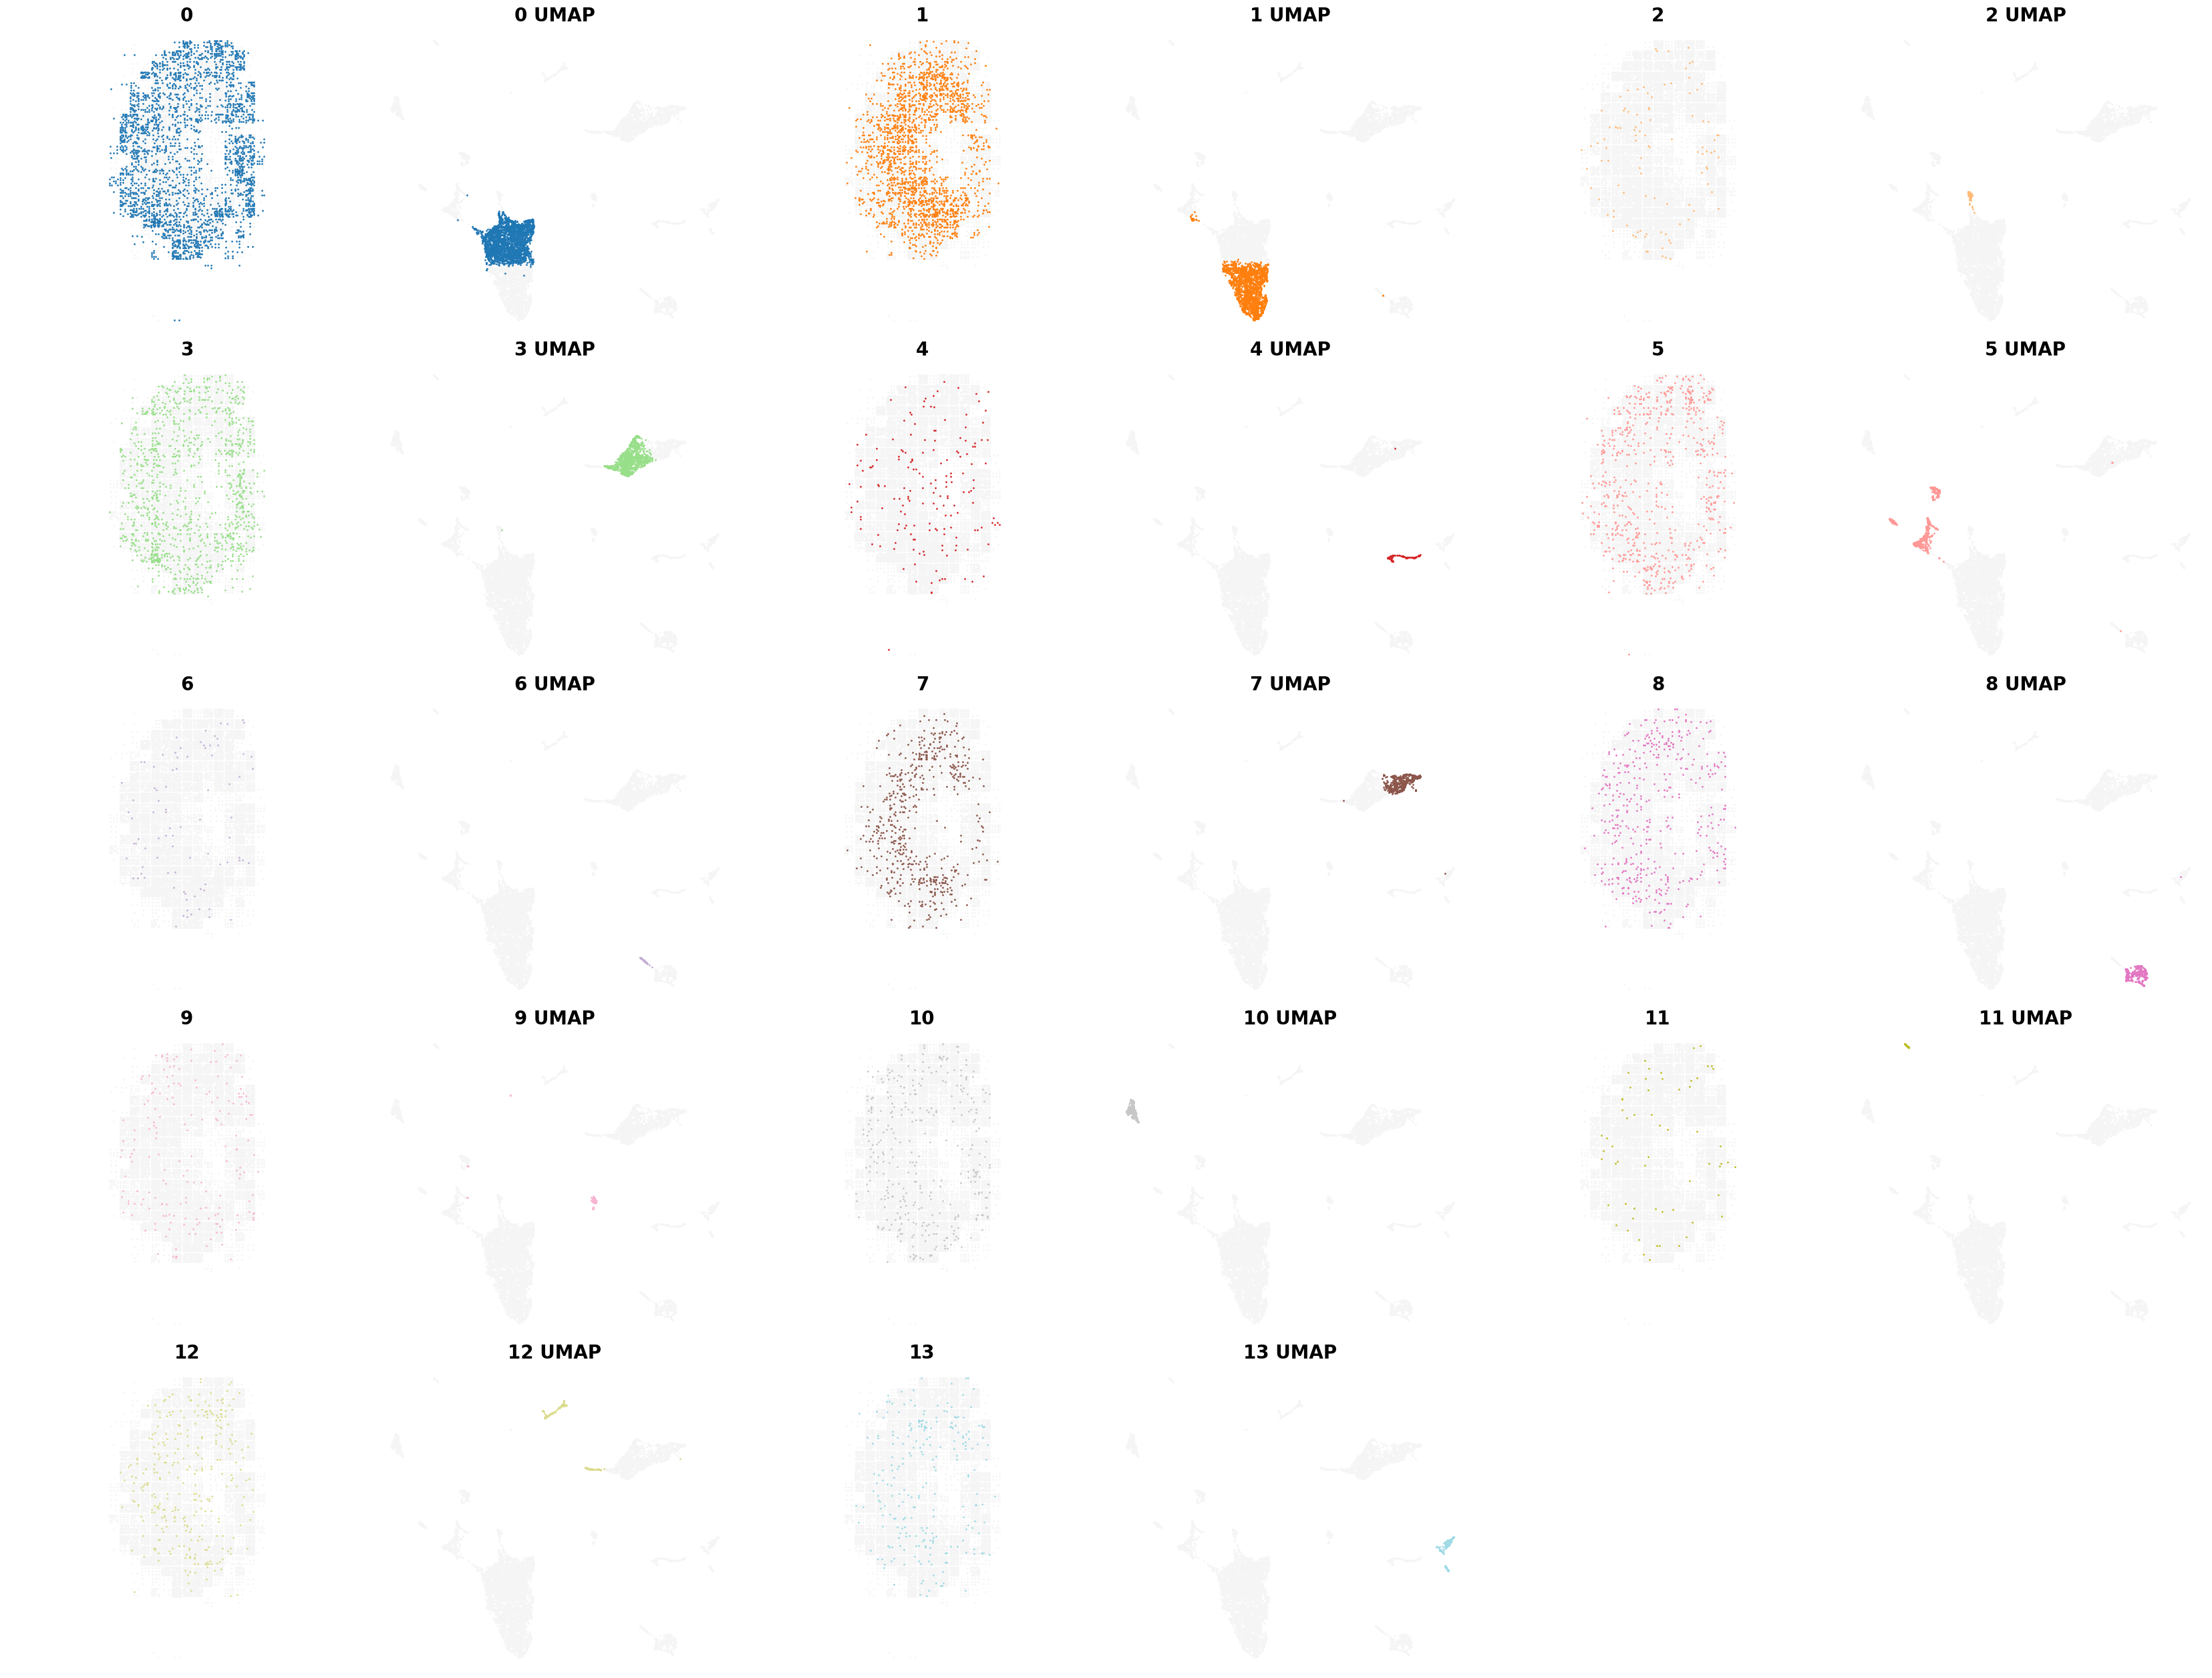

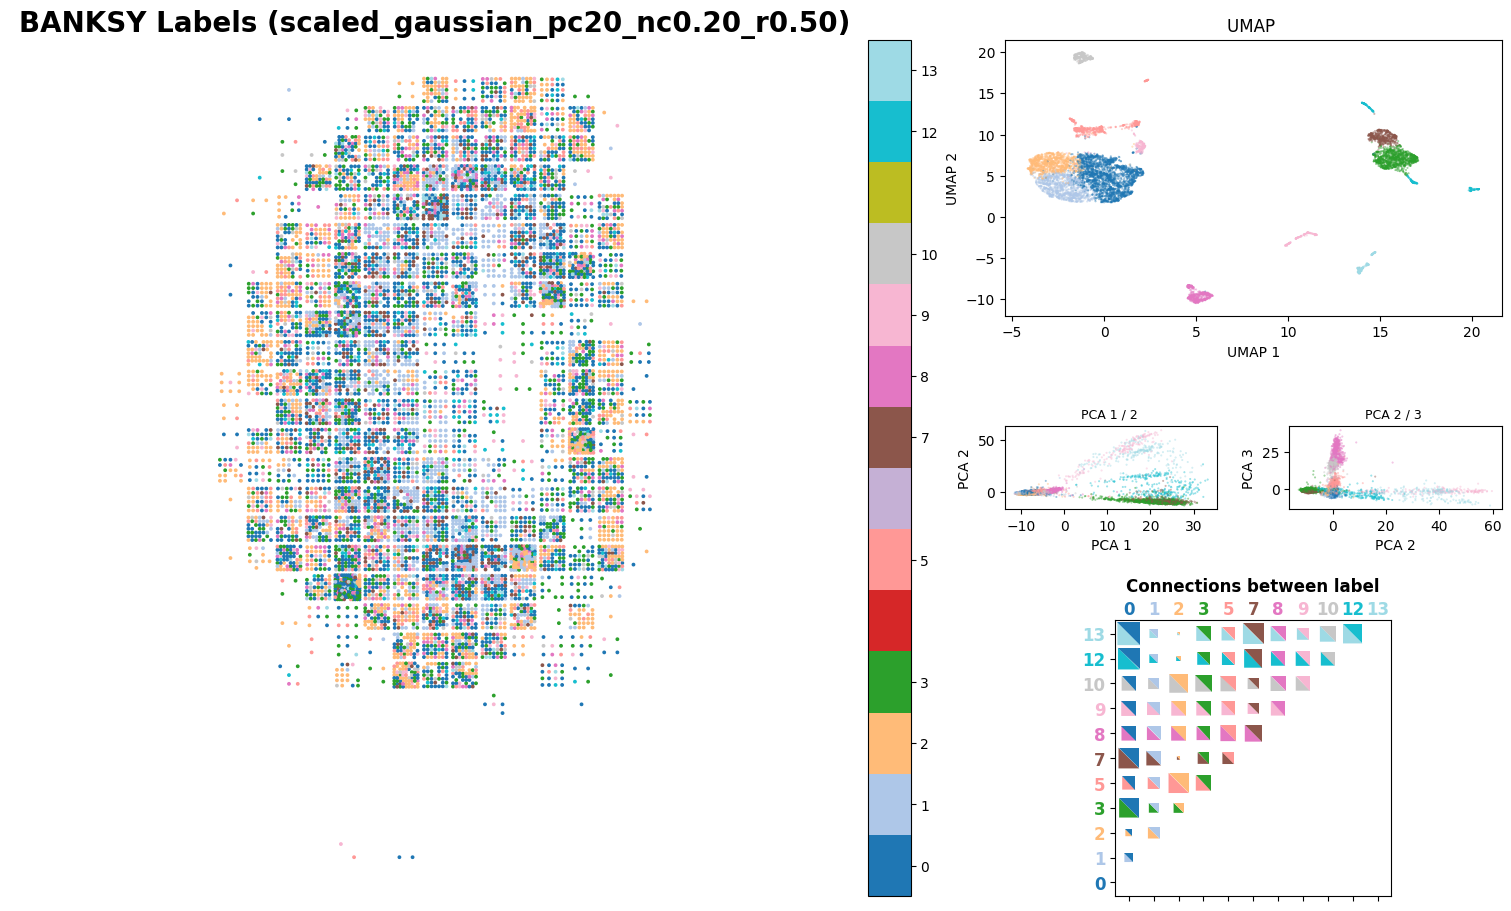

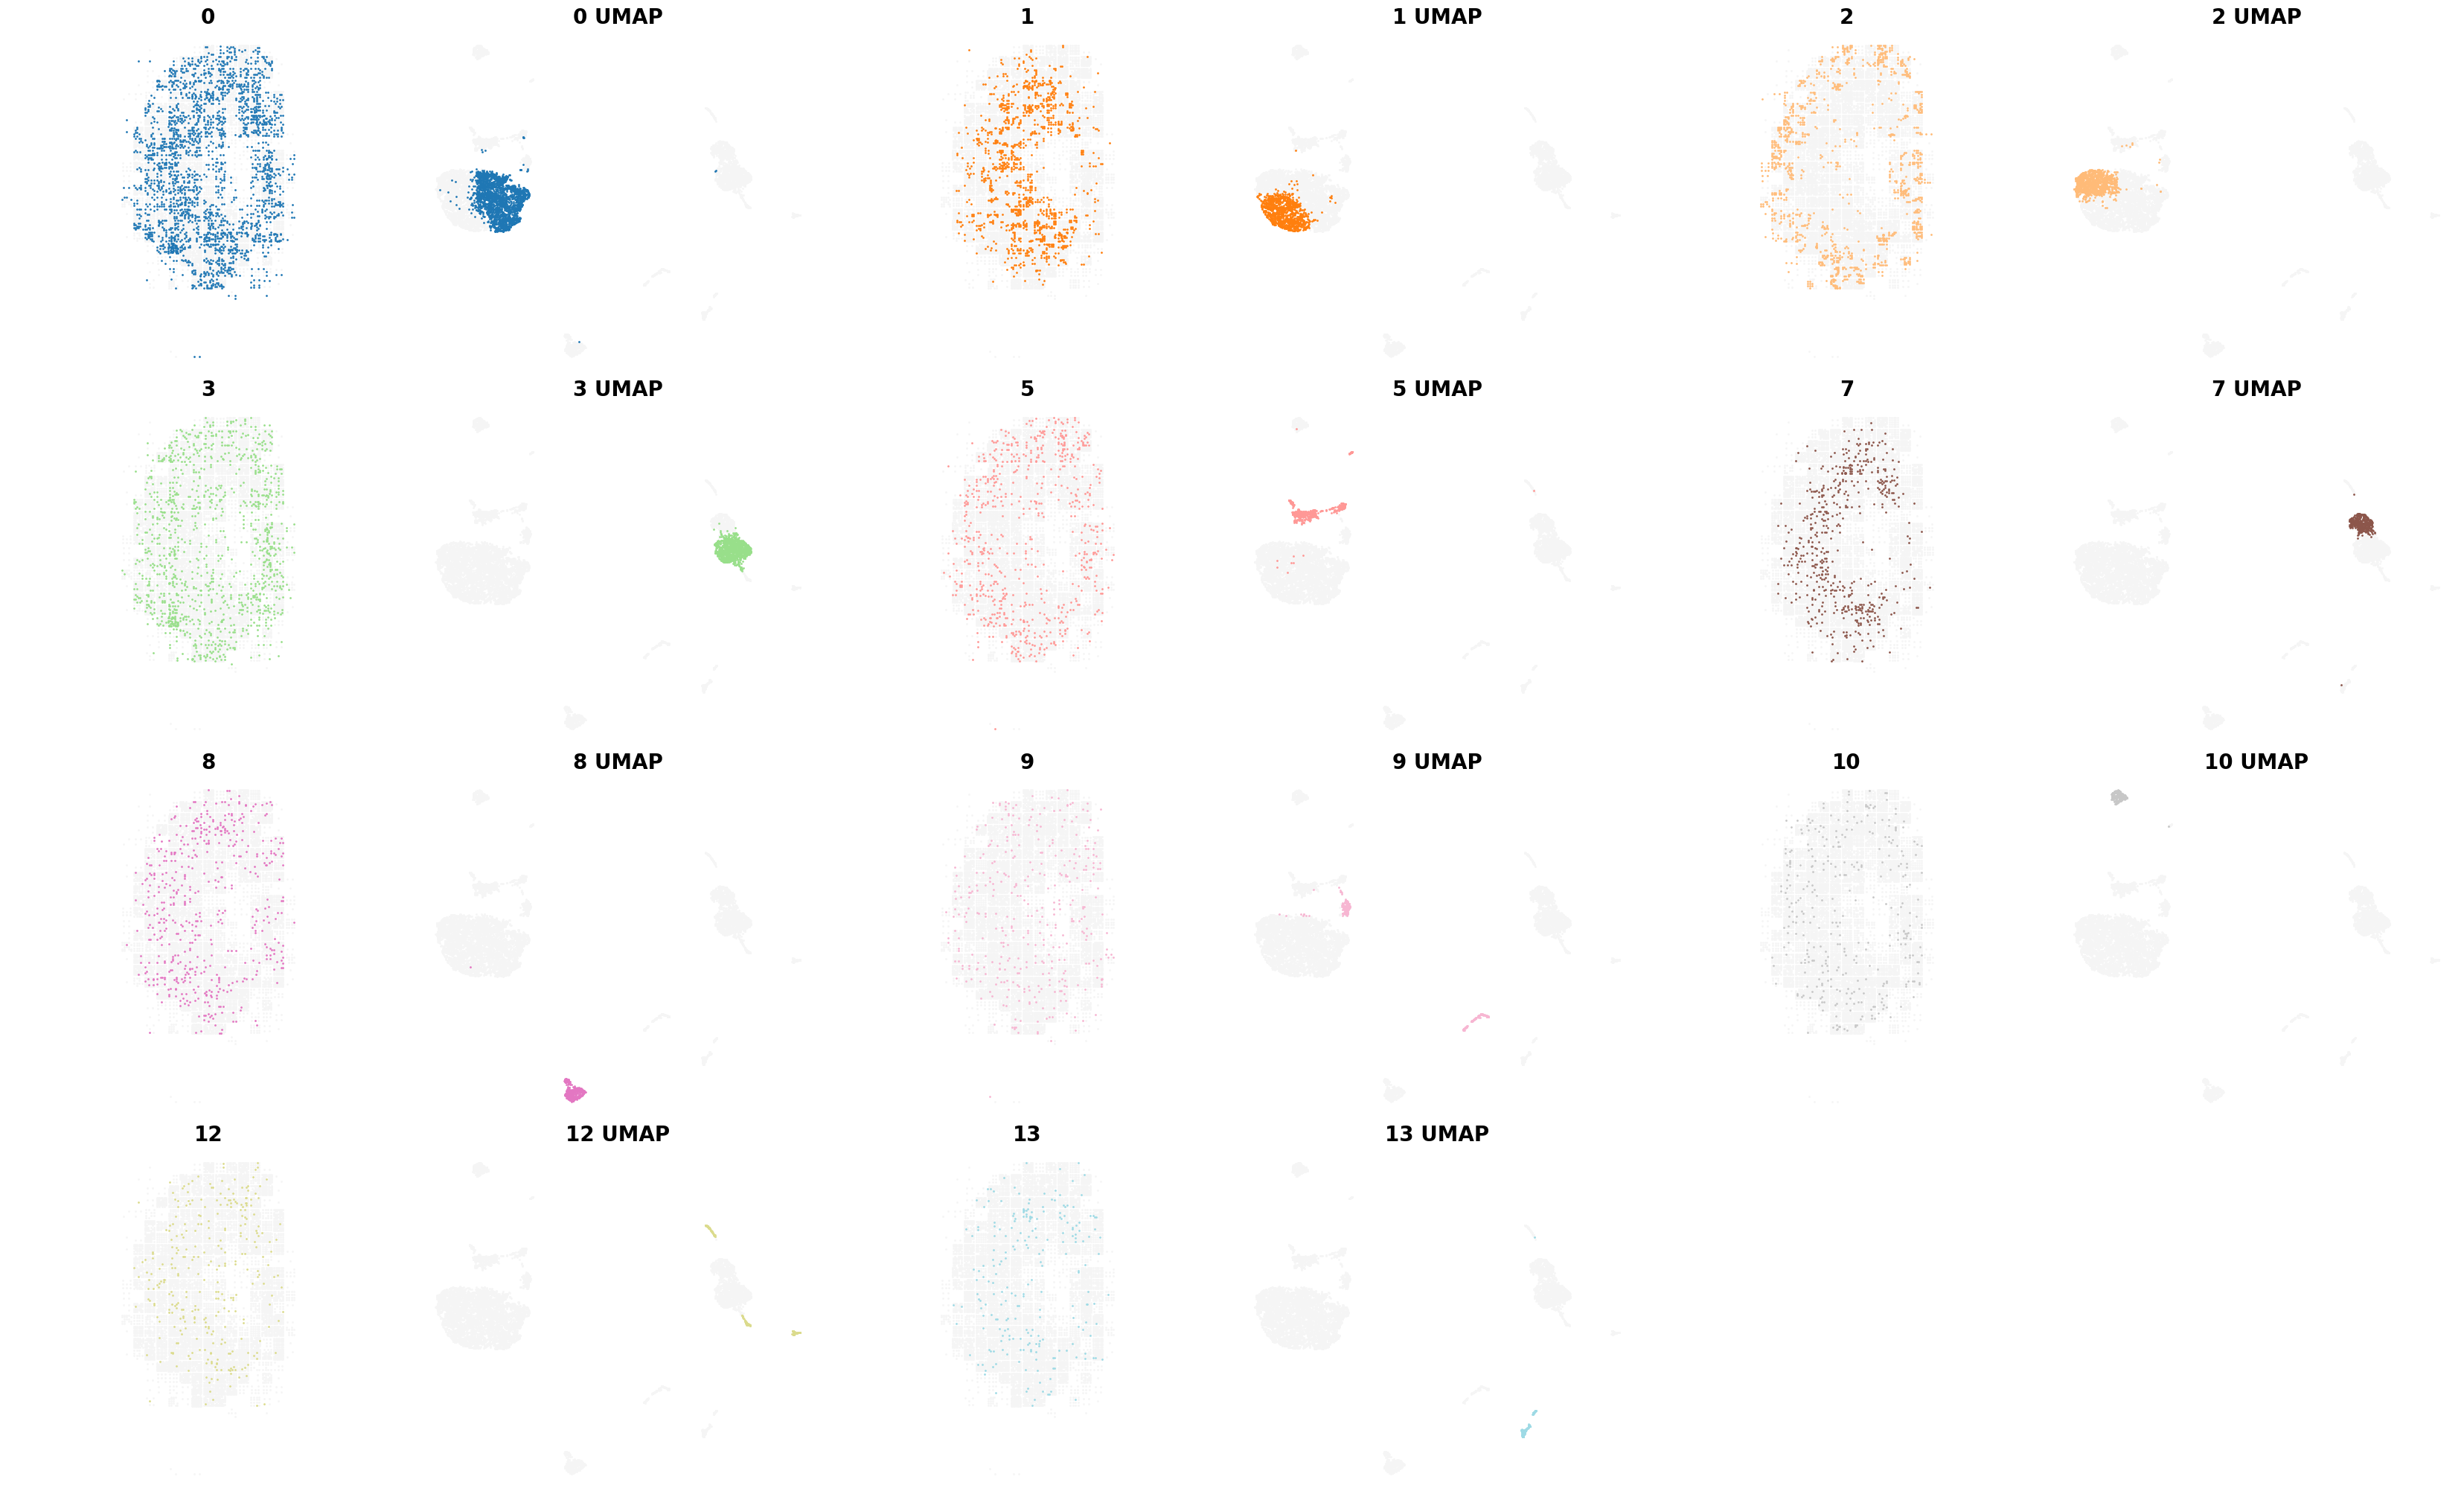

In [62]:
from banksy.plot_banksy import plot_results

c_map =  'tab20' # specify color map
weights_graph =  banksy_dict['scaled_gaussian']['weights'][0]

plot_results(
    results_df,
    weights_graph,
    c_map,
    match_labels = True,
    coord_keys = ('x', 'y', 'spatial'),
    max_num_labels  =  max_num_labels, 
    save_path = '/tmp',
    save_fig = True
)

<Axes: xlabel='x', ylabel='y'>

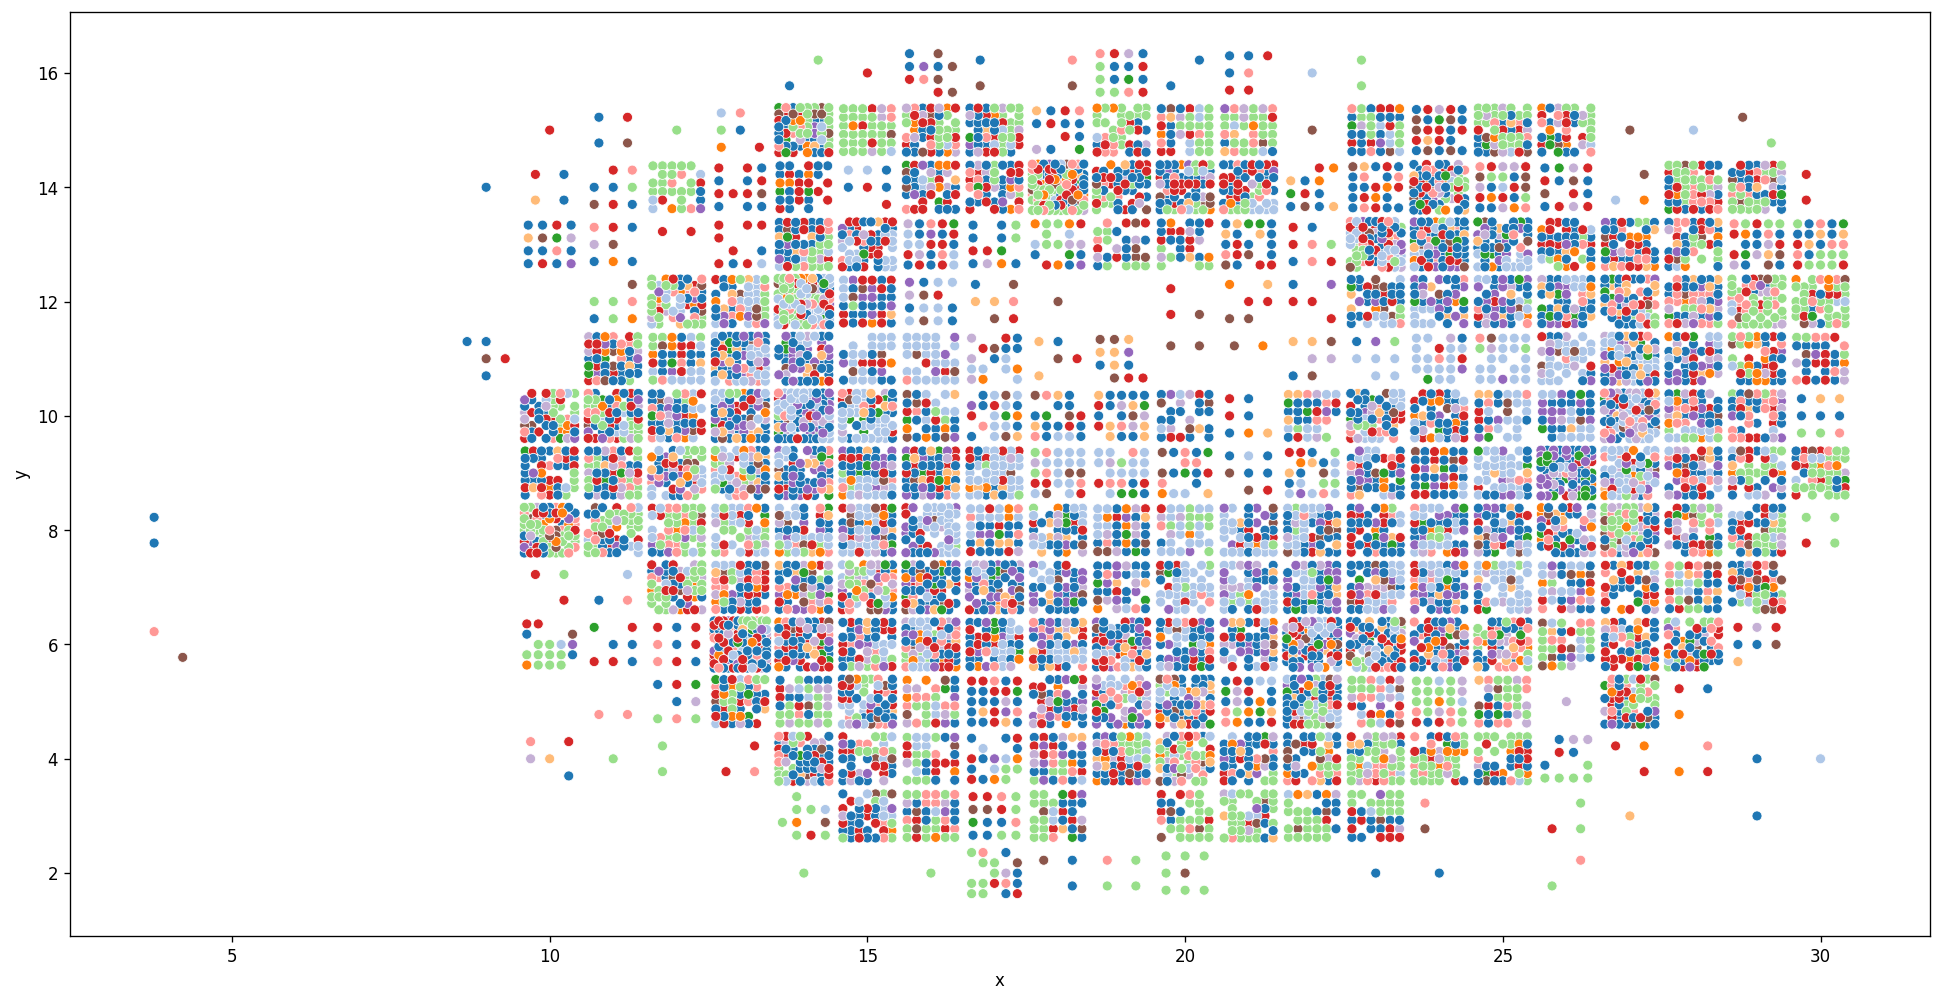

In [83]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 120
sns.scatterplot(
    data=results_df.iloc[1].adata.obs[['labels_scaled_gaussian_pc20_nc0.20_r0.50']].join(
        pd.DataFrame(adata.obsm['spatial'], 
        columns=['x', 'y'], index=adata.obs_names)), 
        x='x', y='y', hue='labels_scaled_gaussian_pc20_nc0.20_r0.50', legend=False, palette='tab20')


In [86]:
adata.var_names

Index(['Sox17', 'St18', 'Gm26901', 'Prex2', 'Gm29570', 'Lactb2', 'Kcnb2',
       'Stau2', 'Pi15', 'Crispld1',
       ...
       'Tmsb4x', 'Tlr8', 'Tlr7', 'Frmpd4', 'Arhgap6', 'Amelx', 'Gm15246',
       'Mid1', 'Gm15726', 'Gm21887'],
      dtype='object', length=3512)

In [90]:
markers = ['Kdr', 'Pax8', 'Podxl', 'Calb1', 'Cd52', 'Gata3', 'Meis1', 'Fcer1g', 'Lrp2', 'Col1a1', 'Emcn']

/opt/homebrew/Caskroom/miniforge/base/envs/SpaceOracle/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 10536 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


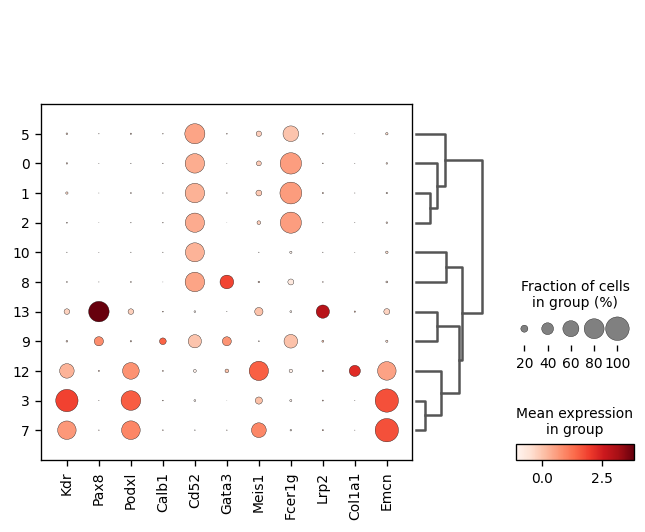

In [92]:
sc.pl.dotplot(
    results_df.iloc[1].adata,
    var_names=markers,
    groupby='labels_scaled_gaussian_pc20_nc0.20_r0.50',
    dendrogram=True,
)